In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os, os.path
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sys
print("Python version")
print (sys.version)

#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

Python version
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [2]:
win_path = r"C:\Users\Andy Guevara\Projects\EEG Project\Data\Wins"
lose_path = r"C:\Users\Andy Guevara\Projects\EEG Project\Data\Losses"

win_filenames = os.listdir(win_path)
lose_filenames = os.listdir(lose_path)

pca = PCA(5)

def get_PCA(pca, data):
    data = pca.fit_transform(data)
    return data

(0.0, 30.0)

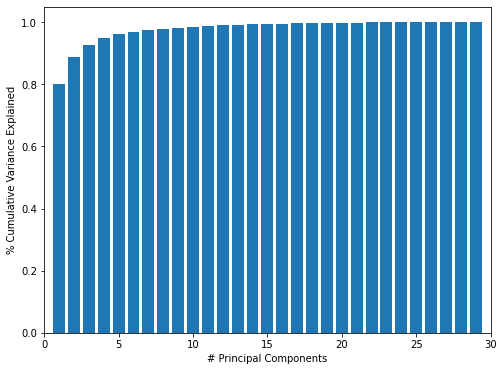

In [3]:
test_data = pd.read_csv(win_path + '\\' + win_filenames[1]) 
n_components = 29

#For determining number of principal components
pca_test = PCA(n_components)
pca_test.fit(np.transpose(test_data))
test_data2 = pca_test.transform(np.transpose(test_data))
#test_data2 = np.transpose(test_data2)

cum_exp_var = []
var_exp = 0
for i in pca_test.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,n_components + 1), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');
plt.xlim([0,30])

([<matplotlib.axis.XTick at 0x27703daaa90>,
 [Text(0, 0, '0'), Text(0, 0, '300'), Text(0, 0, '600')])

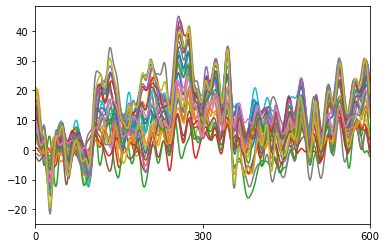

In [4]:
fig0 = plt.figure()
plt.plot(np.transpose(test_data))
plt.xlim([0,600])
plt.xticks([0,300,600],[0,300,600])

In [3]:
X = []
y = []

for filename in win_filenames:
    path = win_path + '\\' + filename
    data = genfromtxt(path, delimiter=',')
    data = np.transpose(data)
    X.append(data)
    y.append(1)

for filename in lose_filenames:
    path = lose_path + '\\' + filename
    data = genfromtxt(path, delimiter=',')
    data = np.transpose(data)
    X.append(data)
    y.append(0)

In [4]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(30441, 600, 30) (30441,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 10)

([<matplotlib.axis.XTick at 0x2894466a4c0>,
 [Text(0, 0, 'Lose'), Text(1, 0, 'Win')])

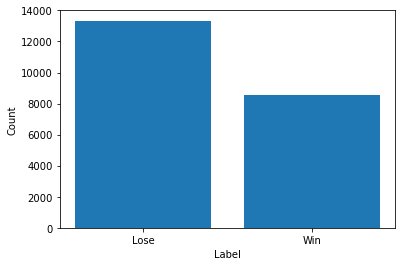

In [6]:
y_counts = collections.Counter(y_train)

fig3 = plt.figure(figsize=(6, 4))
plt.bar(y_counts.keys(), y_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1], ['Lose', 'Win'])

In [8]:
save_path = r'C:\Users\Andy Guevara\Projects\EEG Project\Np arrays'

np.save(save_path+'\\'+'X_train',X_train)
np.save(save_path+'\\'+'X_test',X_test)
np.save(save_path+'\\'+'X_val',X_val)
np.save(save_path+'\\'+'y_train',y_train)
np.save(save_path+'\\'+'y_test',y_test)
np.save(save_path+'\\'+'y_val',y_val)